In [1]:
addpath('answers/useful_library')

# Bloch Equation Simulation


In a classical description of nuclear magnetic resonance (NMR), motion of a single "species" obeys the Bloch Equation. The well-known solution of the Bloch Equation consists of T1 and T2 relaxation and precession. Bloch simulation is the most accurate way to study the effect of a pulse sequence on magnetization. This tutorial provides a series of exercises to allow the reader to develop effective Bloch Equation simulations. A useful library of MATLAB functions is created during the tutorial. 

----------------

# Introduction

---------------

# A | Matrix Basics
---------------

## Objectives

    1. Express magnetization as a 3x1 vector.
    2. Express T2-relaxation in matrix form.
    3. Express T1-relaxation in matrix form.
    4. Develop functions to perform rotations.
    5. Calculate combined relaxation/precession effects. 
    


## A-1 | Vectors
---------------
We will always work in the rotating reference frame; that is we assume that on-resonant magnetization does not precess. We start by assuming that the equilibrium magnetization vector is $[0, 0, 1]'$, where the $'$ denotes the transpose.

## A-2 | Transverse Relaxation
---------------
Transverse relaxation is an exponential decay process of the $x$ and $y$ components of magnetization. This decay is always occuring. Mathematically this means:  

$$M_x(t)= M_x(0)e^{-t/T2}$$
$$M_y(t)= M_y(0)e^{-t/T2}$$

### A-2a

Assume $M$ consists of only an $x$ component normalized to $1$. Let $T2 = 100$ ms. Ignoring other effects, what is the magnetization vector due to T2-decay after $50$ ms? 


In [2]:
T2 = 100; % ms
t = 50; % ms

M_1 = [1; 0; 0 ] * exp(-t/T2)


M_1 =

    0.6065
         0
         0



### A-2b

Instead of a simple multiplication, express the magnetization vector as a matrix product $M_1 = A * M$ where A is a $3 \times 3$ matrix. What is the matrix A?

In [3]:
T2 = 100; %ms
t = 50; %ms

A = [exp(-t/T2) 0, 0;0, exp(-t/T2), 0; 0, 0, 1]


A =

    0.6065         0         0
         0    0.6065         0
         0         0    1.0000



## A-3 | Longitudinal Relaxation
---------------

Longitudinal $(z)$ relaxation is a bit more complicated than transverse relaxation. The magnetization recovers exponentially with a time constant T1, to a non-zero value, often called $M_0$. Mathematically, we write:

$$M_z(t)= M_0+[M_z(0)-M_0]e^{-t/T1}$$

In most of this tutorial, we calculate all magnetization and signal levels as fractions of $M_0$, so we assume that $M_0=1$.

T1-relaxation is a bit more difficult, because it is non-linear. However, you should be able to express T1-relaxation in a nice matrix form $M_1=A*M+B$ as before, but with the addition of the $3 \times 1$ vector $B$. We know that the T1 and T2 relaxation effects happen independently. T1 relaxation affects only longitudinal magnetization, and T2 relaxation only affects transverse magnetization. 

Simulate both T1 and T2 relaxation over $50$ ms for $T1=600$ ms and $T2=100$ ms, in the form $M1=A*M+B$. What are $A$ and $B$?

In [4]:
T1 = 600; % ms
T2 = 100; % ms
t = 50; % ms


A = [exp(-t/T2), 0, 0;0, exp(-t/T2), 0; 0, 0, exp(-t/T1)]
B = [0, 0, 1-exp(-t/T1)]'


A =

    0.6065         0         0
         0    0.6065         0
         0         0    0.9200


B =

         0
         0
    0.0800



## A-4 | Rotations: Precession and Excitation
---------------

### A-4a

Now we want to simulate precession. Precession is a rotation of the magnetization vector about the $z$ axis. With matrices, we can express this in the form $M1=R_z*M$, where $R_z$ is a $3 \times 3$ matrix. What is $R_z$ if we want to rotate by an angle $\phi$? 

\begin{equation*}
R_z =  \left[ \begin{array}{ccc}
\cos{\phi} & -\sin{\phi} & 0 \\
\sin{\phi} &  \cos{\phi} & 0 \\
0 &  0 & 1
\end{array}
\right]
\end{equation*}

### A-4b

You are going to use this over and over. Write a function with the syntax ``` function Rz=zrot(phi)```. Test your function to convince yourself that it works. We assume right-handed coordinates and rotations.

In [ ]:
function Rz=zrot(phi)
% phi in radians
    Rz = [cos(phi) -sin(phi) 0;sin(phi) cos(phi) 0; 0 0 1];
end


### A-4c

Now what about excitation? That is also a rotation. For now we can assume that it is a rotation about the $x$ or $y$ axis. Write the functions ```xrot``` and ```yrot```, similar to ```zrot```, and convince yourself that they work. 

In [ ]:
function Ry=yrot(phi)
    Ry = [cos(phi) 0 sin(phi);0 1 0;-sin(phi) 0 cos(phi)];
end

function Rx=xrot(phi)
    Rx = [1 0 0; 0 cos(phi) -sin(phi);0 sin(phi) cos(phi)];
end




## A-5 | Rotations: Precession and Excitation
-------------------------------

### A-5a

We leave excitation for a moment. Look at the matrix $A$ for relaxation (T1 and T2 combined) and for precession, $R_z$. Note that these operations commute: $A*R_z$ = $R_z*A$. Over some interval, the effects of precession and relaxation can be applied in any order. 

Write a matlab function with the syntax ``` function [Afp,Bfp]=freeprecess(T,T1,T2,df)``` that returns the matrices such that $M_1=A_{fp}*M+B_{fp}$. Here $T$ is the duration of the free precession (ms), T1 and T2 are the relaxation times (ms) and $df$ is the off-resonance frequency (Hz). 

In [ ]:
function [Afp,Bfp]=freeprecess(T,T1,T2,df)
%
%	Function simulates free precession and decay
%	over a time interval T, given relaxation times T1 and T2
%	and off-resonance df.  Times in ms, off-resonance in Hz.

phi = 2*pi*df*T/1000;	% Resonant precession, radians.
E1 = exp(-T/T1);	
E2 = exp(-T/T2);

Afp = [E2 0 0;0 E2 0;0 0 E1]*zrot(phi);
Bfp = [0 0 1-E1]';



### A-5b

For $T1 = 600$ ms, $T2 = 100$ ms, $df = 10$ Hz, use your function freeprecess.m to plot $M_x, M_y, M_z$ vs time starting from M=[1, 0, 0]'. Use a time step of $1$ ms, and plot the response for $1000$ ms. You should only need to call freeprecess.m once! You have just plotted the free-induction-decay (FID) for a single species. 

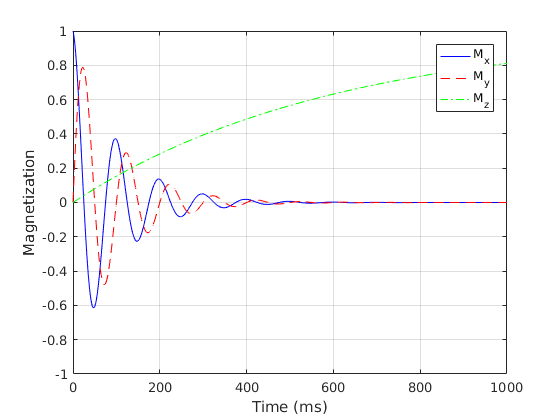

In [5]:
dT = 1;		% 1ms delta-time.
T = 1000;	% total duration
N = ceil(T/dT)+1; % number of time steps.
df = 10;	% Hz off-resonance.
T1 = 600;	% ms.
T2 = 100;	% ms.

% ===== Get the Propagation Matrix ======

[A,B] = freeprecess(dT,T1,T2,df);


% ===== Simulate the Decay ======

M = zeros(3,N);	% Keep track of magnetization at all time points.
M(:,1)=[1;0;0];	% Starting magnetization.

for k=2:N
	M(:,k) = A*M(:,k-1)+B;
end;


% ===== Plot the Results ======

time = [0:N-1]*dT;
plot(time,M(1,:),'b-',time,M(2,:),'r--',time,M(3,:),'g-.');
legend('M_x','M_y','M_z');
xlabel('Time (ms)');
ylabel('Magnetization');
axis([min(time) max(time) -1 1]);
grid on;